<a href="https://colab.research.google.com/github/angadkumar9128/angadkumar9128/blob/main/%20statistical%20operation%20and%20different%20visualization%20using%20pandas%20and%20matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


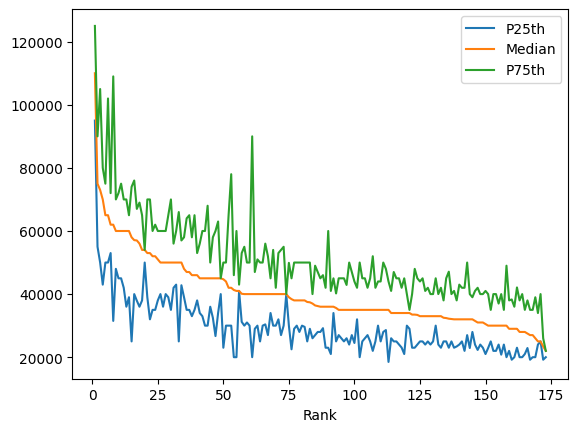

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/recent-grads.csv")
type(df)
pd.set_option("display.max.columns", None)
df.head()
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()


<Axes: xlabel='Rank'>

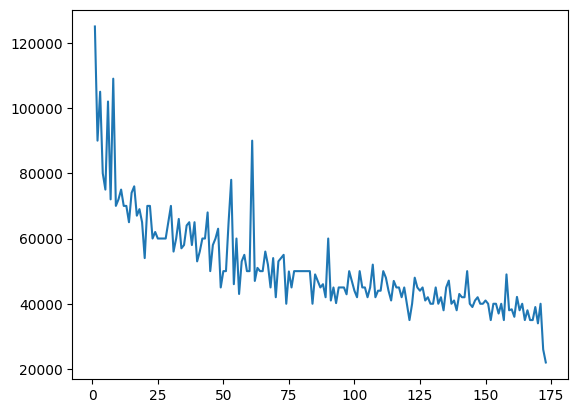

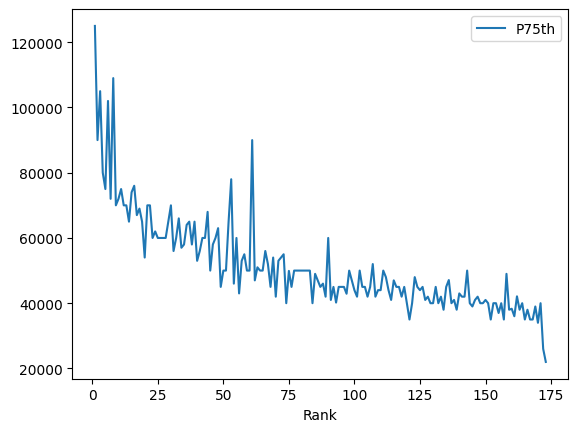

In [8]:
plt.plot(df["Rank"], df["P75th"])
df.plot(x="Rank", y="P75th")


<Axes: ylabel='Frequency'>

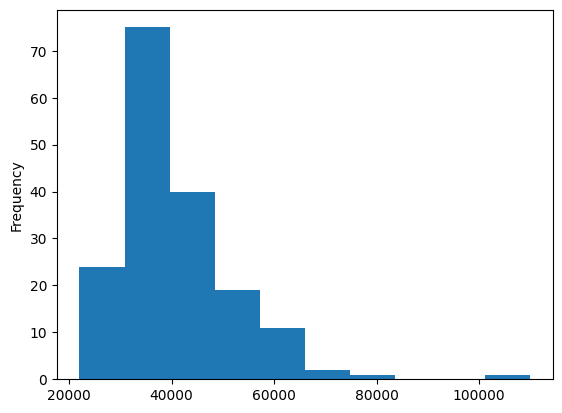

In [9]:
median_column = df["Median"]
type(median_column)
median_column.plot(kind="hist")


<Axes: xlabel='Major'>

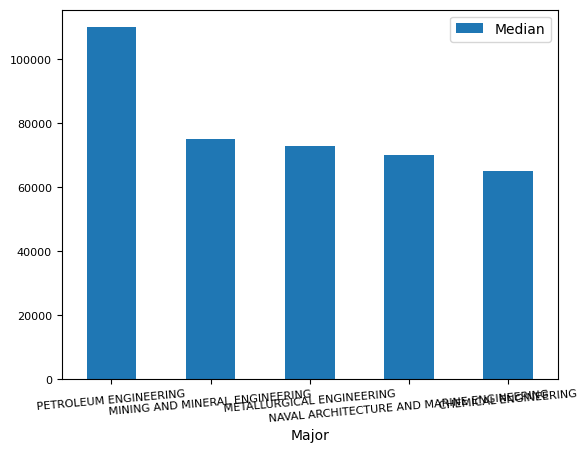

In [11]:
top_5 = df.sort_values(by="Median", ascending=False).head()
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=8)


<Axes: xlabel='Major'>

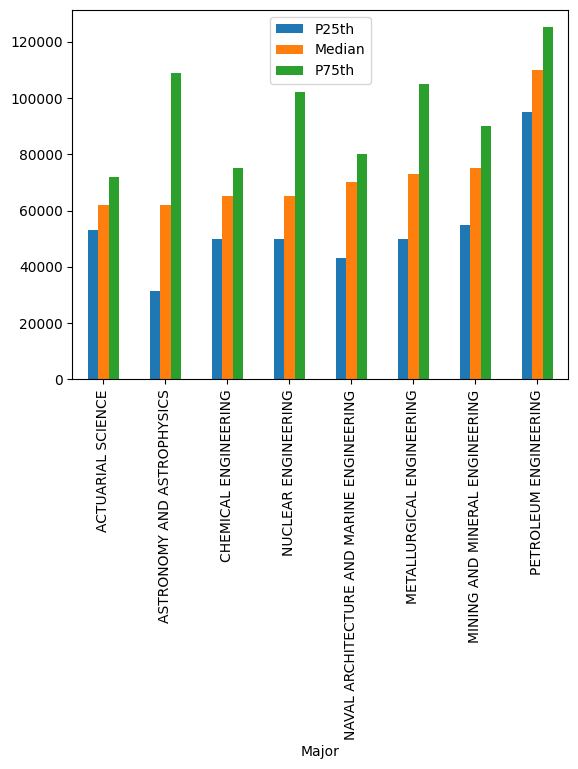

In [12]:
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")




<Axes: xlabel='Median', ylabel='Unemployment_rate'>

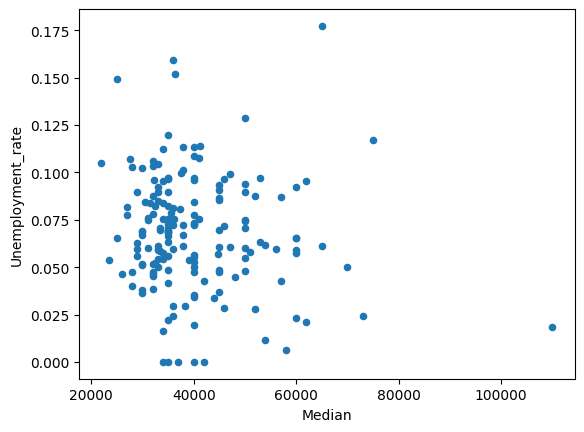

In [13]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")


<Axes: ylabel='Major_category'>

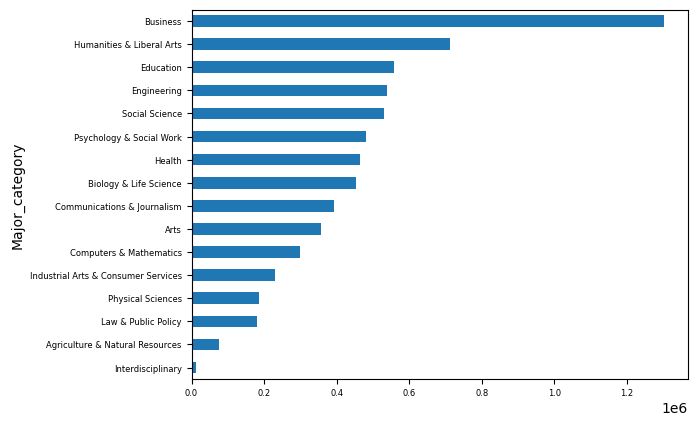

In [16]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()
cat_totals
cat_totals.plot(kind="barh", fontsize=6)


<ipython-input-15-07df9255dbd5>:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  big_cat_totals = big_cat_totals.append(small_sums)


<Axes: >

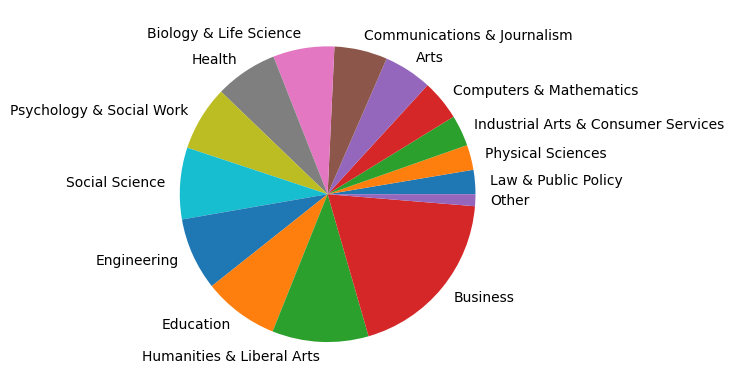

In [15]:
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]
# Adding a new item "Other" with the sum of the small categories
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")


<Axes: ylabel='Frequency'>

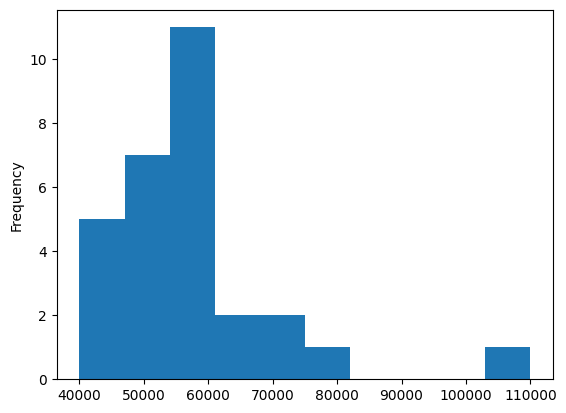

In [17]:
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")